In [8]:
# Set path variables
import os
import sys

cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)

data_path = os.path.join(project_dir, 'data/')
print(project_dir)
print(data_path)

/Users/ab/Projects/Tagging-Music-Sequences
/Users/ab/Projects/Tagging-Music-Sequences/data/


In [9]:
from IPython.display import Audio
import pandas as pd
import random
from src import audio_util
from src.audio_augmentor import AudioAugmentor

In [10]:
# Set a seed for reproducibility
random.seed(1)

In [11]:
# Load label annotation csv
train_annotations = pd.read_csv(data_path + 'mtat_train_label.csv', index_col=0).reset_index(drop=True)

In [12]:
train_annotations.head()

guitar  classical  slow  techno  string  vocal  electro   drum  no singer  \
0    True       True     1       0    True  False    False  False      False   
1   False      False     0       0   False  False    False  False      False   
2   False       True     0       0   False  False    False  False      False   
3   False      False     0       0   False  False    False  False      False   
4   False      False     0       0   False  False    False  False      False   

   rock  ...  no piano   hard  chant  baroque  orchestra  foreign  trance  \
0     0  ...         0  False  False        0      False        0       0   
1     0  ...         0  False  False        0      False        1       0   
2     0  ...         0  False  False        0      False        0       0   
3     0  ...         0  False  False        0      False        0       0   
4     0  ...         0  False  False        0      False        0       0   

   folk  no beat                                           filepath  
0     0    False  mtat/0/paul_berget-the_siena_manuscript_on_ste...  
1     0    False  mtat/e/briddes_roune-lenten_is_come-04-the_mil...  
2     0    False  mtat/1/suzanne_teng-mystic_journey-08-clouds_a...  
3     0    False    mtat/7/solace-shawaza-08-serpentine-436-465.mp3  
4     0    False  mtat/7/rob_costlow-woods_of_chaos-10-twilight-...  

[5 rows x 51 columns]

### Original Audio

In [13]:
filepath = data_path + train_annotations['filepath'][0]
waveform, sample_rate = audio_util.open(filepath)

In [14]:
print(filepath)

/Users/ab/Projects/Tagging-Music-Sequences/data/mtat/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-06-recercar_6_steel_string_guitar-30-59.mp3


### Time Stretching

https://iopscience.iop.org/article/10.1088/1742-6596/1453/1/012085/meta
-> suggests `stretch_factor` $\in [0.8, 1.25]$

In [15]:
stretch_factor = random.uniform(0.8, 1.25)

In [16]:
waveform_stretched, sample_rate = AudioAugmentor.time_stretch(audio, stretch_factor=stretch_factor)

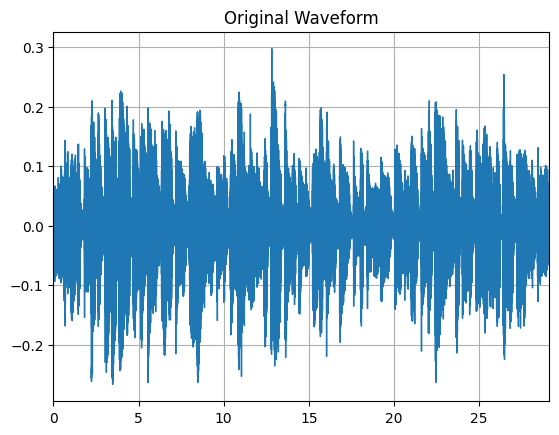

In [17]:
audio_util.plot_waveform(waveform, sample_rate, title='Original Waveform')

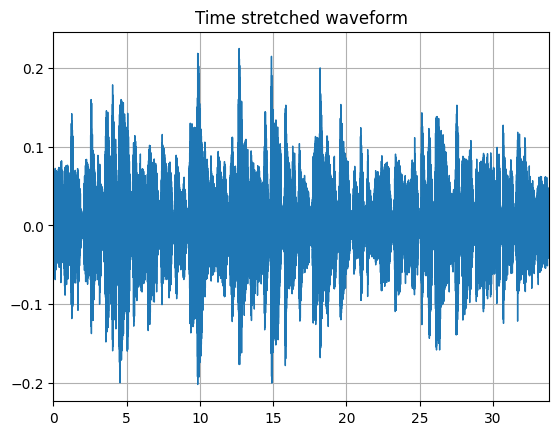

In [18]:
audio_util.plot_waveform(waveform_stretched, sample_rate, title='Time stretched waveform')

In [19]:
# Original audio
Audio(filepath)

In [20]:
# Stretched audio
Audio(waveform_stretched, rate=sample_rate)

### Pitch shifting

https://iopscience.iop.org/article/10.1088/1742-6596/1453/1/012085/meta
-> suggests n_steps set of [-4, 4]

In [21]:
waveform_pitch_shifted, sample_rate = AudioAugmentor.pitch_shift(audio, n_steps=10)

In [22]:
# Original audio
Audio(filepath)

In [23]:
# Pitch shifted audio
Audio(waveform_pitch_shifted.detach().numpy(), rate=sample_rate)

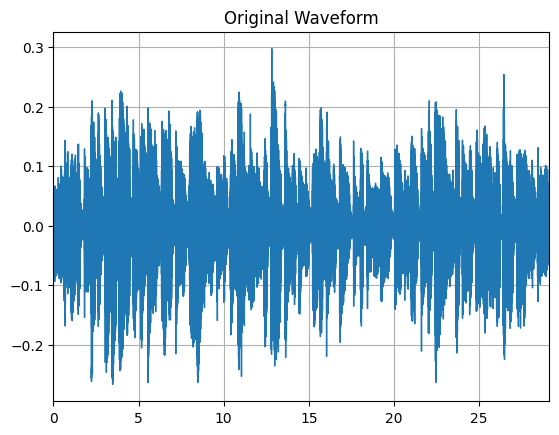

In [24]:
audio_util.plot_waveform(waveform, sample_rate, title='Original Waveform')

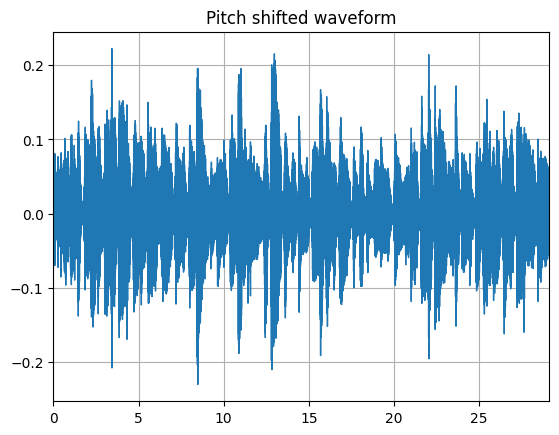

In [25]:
audio_util.plot_waveform(waveform_pitch_shifted, sample_rate, title='Pitch shifted waveform')

## Generate new samples

Main driver code to perform augmentation across whole training data

In [26]:
# Try out augmentor class
data_path = '../data/mtat_train_label.csv'
output_dir = 'mtat/augmented'
augmentations = [
    {'name': 'pitch_shift', 'params': {'n_steps': random.randint(-4, 4)}},
    {'name': 'time_stretch', 'params': {'stretch_factor': random.uniform(0.8, 1.25)}}
]

augmentor = AudioAugmentor(data_path, output_dir, augmentations, n_augmentations=3)

augmentor.load_data()
print(augmentor.train_original.shape)  # expected to be 12983 + (12983 * n) after transformation 

# only take first two rows to see results
augmentor.train_original = augmentor.train_original[:2]
augmentor.perform_augmentations(dry_run=True)

(12983, 51)


In [27]:
df_aug = augmentor.df_aug

In [28]:
df_aug

guitar  classical  slow  techno  string  vocal  electro   drum  no singer  \
0    True       True     1       0    True  False    False  False      False   
1   False      False     0       0   False  False    False  False      False   
2    True       True     1       0    True  False    False  False      False   
3    True       True     1       0    True  False    False  False      False   
4    True       True     1       0    True  False    False  False      False   
5   False      False     0       0   False  False    False  False      False   
6   False      False     0       0   False  False    False  False      False   
7   False      False     0       0   False  False    False  False      False   

   rock  ...  no piano   hard  chant  baroque  orchestra  foreign  trance  \
0     0  ...         0  False  False        0      False        0       0   
1     0  ...         0  False  False        0      False        1       0   
2     0  ...         0  False  False        0      False        0       0   
3     0  ...         0  False  False        0      False        0       0   
4     0  ...         0  False  False        0      False        0       0   
5     0  ...         0  False  False        0      False        1       0   
6     0  ...         0  False  False        0      False        1       0   
7     0  ...         0  False  False        0      False        1       0   

   folk  no beat                                           filepath  
0     0    False  mtat/0/paul_berget-the_siena_manuscript_on_ste...  
1     0    False  mtat/e/briddes_roune-lenten_is_come-04-the_mil...  
2     0    False  mtat/augmented/paul_berget-the_siena_manuscrip...  
3     0    False  mtat/augmented/paul_berget-the_siena_manuscrip...  
4     0    False  mtat/augmented/paul_berget-the_siena_manuscrip...  
5     0    False  mtat/augmented/briddes_roune-lenten_is_come-04...  
6     0    False  mtat/augmented/briddes_roune-lenten_is_come-04...  
7     0    False  mtat/augmented/briddes_roune-lenten_is_come-04...  

[8 rows x 51 columns]

Manually inspect results for one sample

Requires data to already be loaded into augmented folder (run `python src/audio_data_augmentor.py`)

In [29]:
# Original version
print(df_aug['filepath'][0])
Audio('../data/' + df_aug['filepath'][0])

mtat/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-06-recercar_6_steel_string_guitar-30-59.mp3


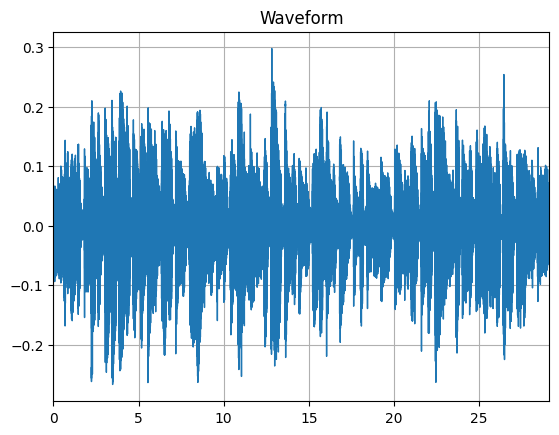

In [30]:
waveform, sample_rate = audio_util.open('../data/' + df_aug['filepath'][0])
audio_util.plot_waveform(waveform, sample_rate)

In [31]:
# Augmented version 1
print(df_aug['filepath'][2])
Audio('../data/' + df_aug['filepath'][2])

mtat/augmented/paul_berget-the_siena_manuscript_on_steel_string_guitar-06-recercar_6_steel_string_guitar-30-59_aug_0.wav


In [32]:
# Augmented version 2
print(df_aug['filepath'][3])
Audio('../data/' + df_aug['filepath'][3])

mtat/augmented/paul_berget-the_siena_manuscript_on_steel_string_guitar-06-recercar_6_steel_string_guitar-30-59_aug_1.wav
